# Introducción a OpenCV para preprocesamiento de imágenes

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

print cv2.__version__
plt.style.use(plt.style.available[2])

3.2.0


In [6]:
%matplotlib notebook

#### Cómo abrir una imagen?

In [4]:
img = cv2.imread('../images/hist.jpg', 0)
print img

[[ 53  52  52 ...,  32  31  31]
 [ 44  46  51 ...,  32  31  31]
 [ 45  47  48 ...,  32  31  31]
 ..., 
 [102 120 106 ...,  31  31  31]
 [ 74  91  84 ...,  31  31  31]
 [ 62  73  73 ...,  31  31  31]]


#### Cómo cambiar tamaño de imágenes?

(128, 128) (600, 1200)


<IPython.core.display.Javascript object>


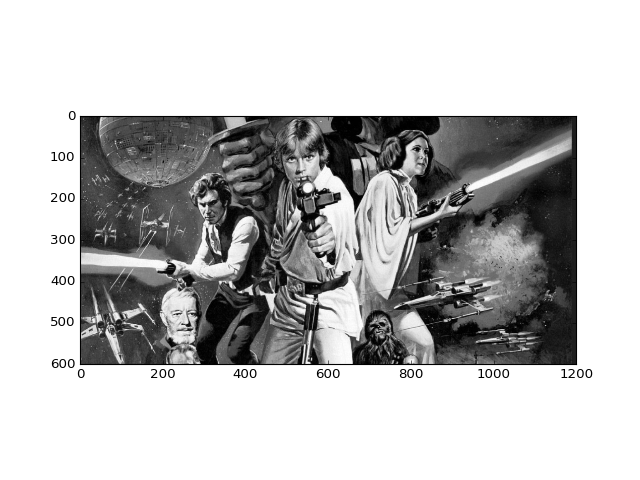

In [5]:
res = cv2.resize(img, (128, 128), interpolation = cv2.INTER_CUBIC)
print res.shape, img.shape
plt.imshow(img, cmap='gray')

<IPython.core.display.Javascript object>


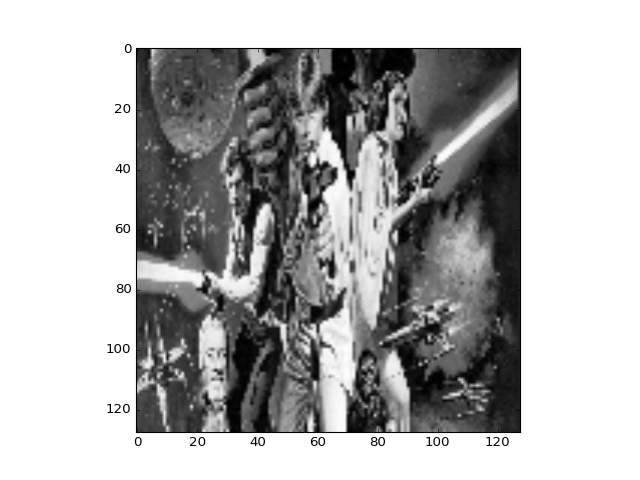

In [6]:
plt.imshow(res, cmap='gray')

#### Transformaciones sobre imágenes
##### Rotación

<IPython.core.display.Javascript object>


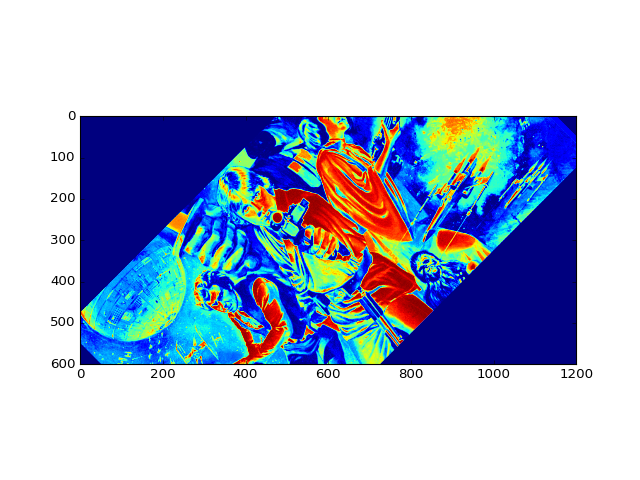

In [7]:
(rows, cols) = img.shape

M = cv2.getRotationMatrix2D((cols / 2,rows / 2), 45, 1)
dst = cv2.warpAffine(img, M,(cols, rows))

plt.imshow(dst)

#### Ecualización de Histogramas

<IPython.core.display.Javascript object>


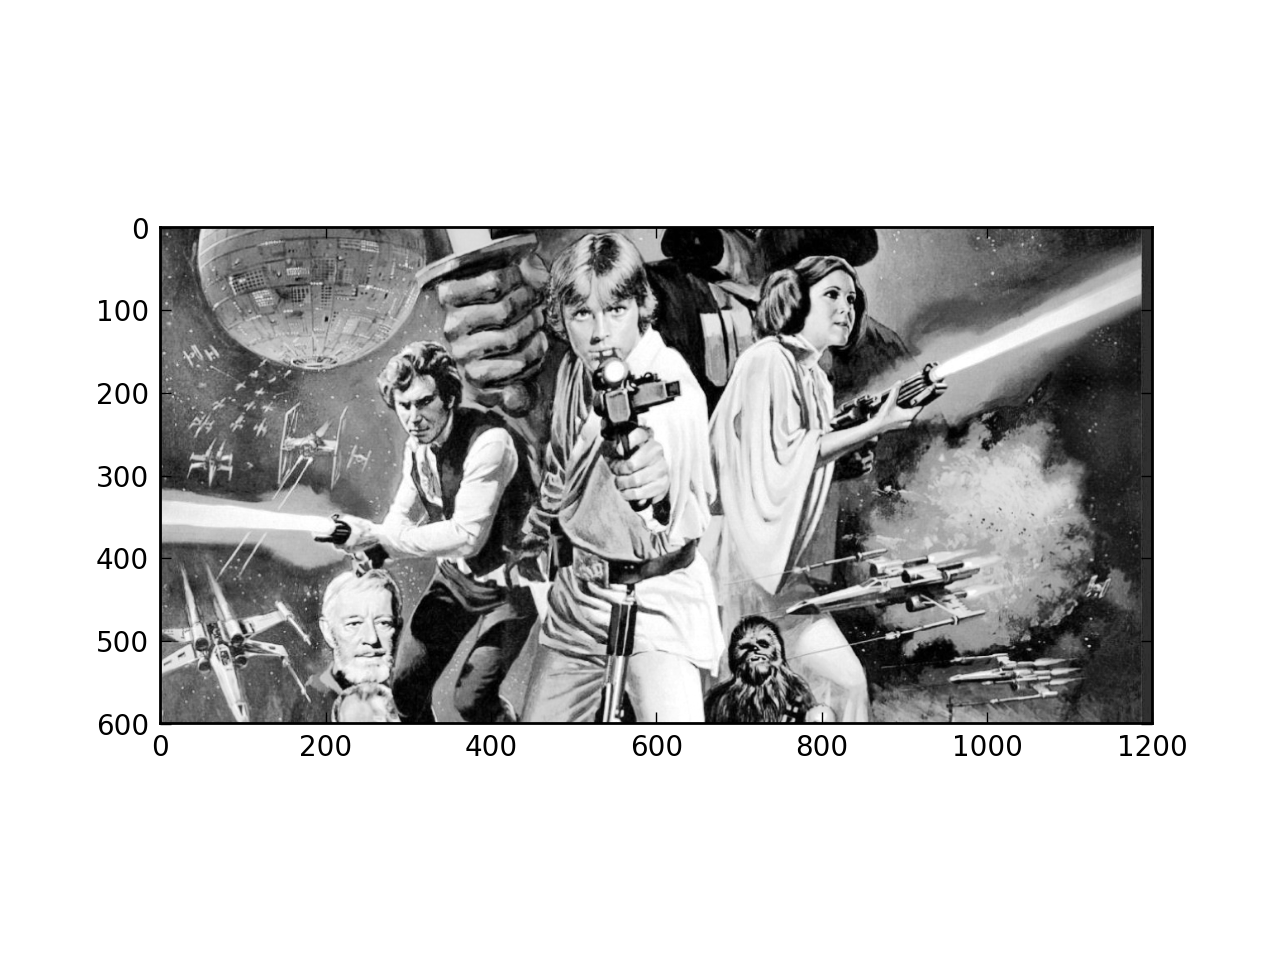

In [7]:
img = cv2.imread('../images/hist.jpg', 0)
img_ = cv2.equalizeHist(img)
plt.imshow(img_, cmap='gray')

<IPython.core.display.Javascript object>


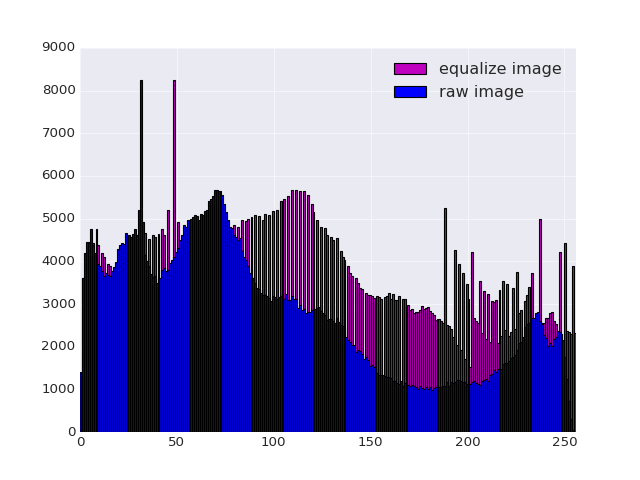

In [9]:
plt.style.use(plt.style.available[0])
hist = plt.hist(img_.ravel(), 256, [0, 256], color='m', label='equalize image')
hist = plt.hist(img.ravel(), 256, [0, 256], label='raw image')
plt.xlim(0, 256)
plt.legend()

#### Cómo sacar imagenes de un video ?

In [15]:
def split_video(file_name, d_path):
    cap = cv2.VideoCapture(file_name)
    frames_count = cap.get(7)
    frame_rotated = cap.get(3) > cap.get(4)
    
    for frame_id in range(int(frames_count)):
        ret, frame = cap.read()
        if frame_id%2 == 0 and not frame_rotated:
            frame = np.rot90(frame, 3)
        
        cv2.imwrite("{}image-{}.jpg".format(d_path, str(frame_id)), frame)

In [16]:
split_video("../data/videos/VID_20160812_193115.mp4", "/tmp/")